In [35]:
import pandas
import numpy as np
import osmnx as ox
import time
from shapely.geometry import Polygon
import os
import ast
import matplotlib.pyplot as plt

fmm_output = pandas.read_csv('postprocessed_output.csv')

In [10]:
fmm_output = fmm_output.sort_values(by='trajectory_id', ascending=True)
fmm_output[0:10]

,trajectory_id,raw_gps_trajectories,match_success,fmm-mapped node indice sequence(osmid),fmm-mapped edge indice sequence(map edge id)(equivalent to cpath from FMM),fmm-mapped WSG84 points sequence,fmm-mapped WSG84 points 2nd sequence
3,1,"[[-8.618643, 41.141412], [-8.618499, 41.141376...",True,"[122549700, 286969943, 122549700, 111467467, 4...","[483, 1061, 481, 238, 3416, 8462, 3415, 235, 3...","[[-8.61862328377, 41.1414555366], [-8.6183463,...",NaN
10,2,"[[-8.639847, 41.159826], [-8.640351, 41.159871...",True,"[1239645082, 5284452790, 5284452808, 528445279...","[5377, 10376, 10383, 10378, 1953, 5463, 265, 5...","[[-8.63985919436, 41.1597515041], [-8.6400962,...",NaN
661,3,"[[-8.612964, 41.140359], [-8.613378, 41.14035]...",False,NaN,NaN,NaN,NaN
662,4,"[[-8.574678, 41.151951], [-8.574705, 41.151942...",False,NaN,NaN,NaN,NaN
663,5,"[[-8.645994, 41.18049], [-8.645949, 41.180517]...",False,NaN,NaN,NaN,NaN
40,6,"[[-8.615502, 41.140674], [-8.614854, 41.140926...",True,"[3392710660, 2262128243, 2207418932, 419918059...","[8473, 7828, 7706, 8776, 7423, 241, 5493, 6982...","[[-8.61551371387, 41.140709502], [-8.6154822, ...",NaN
51,7,"[[-8.57952, 41.145948], [-8.580942, 41.145039]...",True,"[9681200397, 114324784, 297369596, 560975908, ...","[11052, 406, 1080, 4696, 2171, 4745, 10264, 10...","[[-8.579496154, 41.1459330735], [-8.5795208, 4...",NaN
56,8,"[[-8.617563, 41.146182], [-8.617527, 41.145849...",True,"[128680158, 129558556, 314549177, 2213447626, ...","[729, 766, 1678, 7749, 764, 7750, 6750, 6751, ...","[[-8.61764237462, 41.1461624245], [-8.6173499,...",NaN
65,9,"[[-8.611794, 41.140557], [-8.611785, 41.140575...",True,"[111481288, 1277601207, 111481288, 2080756633,...","[242, 5492, 243, 7422, 8777, 7707, 7829, 8473,...","[[-8.61179351282, 41.1405519704], [-8.6117292,...",NaN
664,10,"[[-8.615907, 41.140557], [-8.614449, 41.141088...",False,NaN,NaN,NaN,NaN


/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:326: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:422: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  points_within_geometry = points_within_geometry.append(precise_matches)
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append met

raw start
-8.60881828959 , 41.1471192986
raw end
-8.6084369 , 41.1477731
mapped start
-8.60881828959 , 41.1471192986
mapped end
-8.6084369 , 41.1477731


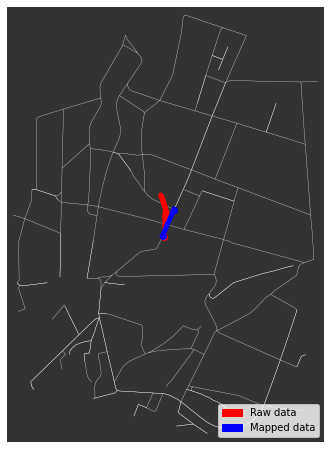

/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:326: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:422: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  points_within_geometry = points_within_geometry.append(precise_matches)
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append met

raw start
-8.5823907 , 41.1805609
raw end
-8.58273627149 , 41.1706680561
mapped start
-8.5823907 , 41.1805609
mapped end
-8.58273627149 , 41.1706680561


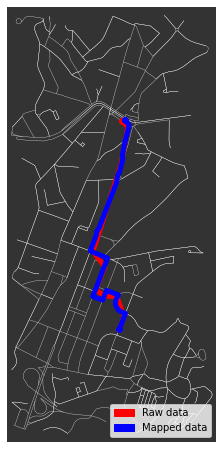

/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:326: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:422: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  points_within_geometry = points_within_geometry.append(precise_matches)
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append met

raw start
-8.61885742704 , 41.1552719036
raw end
-8.61339076099 , 41.1641482325
mapped start
-8.61885742704 , 41.1552719036
mapped end
-8.61339076099 , 41.1641482325


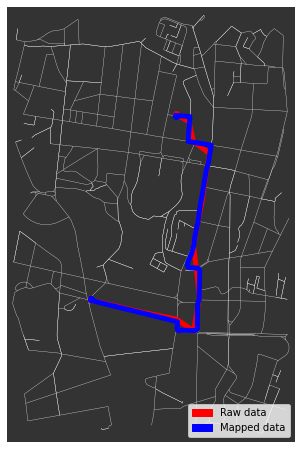

/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:326: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:422: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  points_within_geometry = points_within_geometry.append(precise_matches)
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append met

raw start
-8.61862328377 , 41.1414555366
raw end
-8.6307169 , 41.1544924
mapped start
-8.61862328377 , 41.1414555366
mapped end
-8.6307169 , 41.1544924


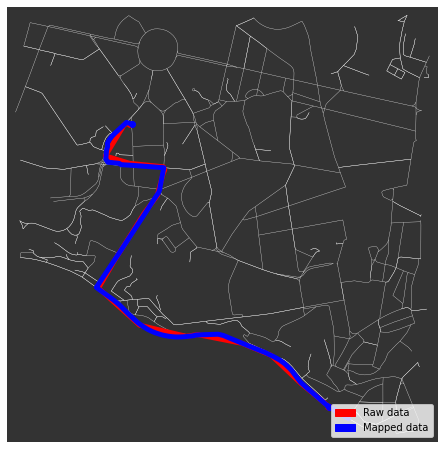

/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:326: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:422: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  points_within_geometry = points_within_geometry.append(precise_matches)
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append met

raw start
-8.60645764867 , 41.1445418433
raw end
-8.60971780501 , 41.1603983468
mapped start
-8.60645764867 , 41.1445418433
mapped end
-8.60971780501 , 41.1603983468


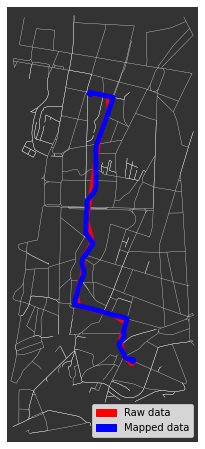

/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:326: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:422: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  points_within_geometry = points_within_geometry.append(precise_matches)
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append met

raw start
-8.6122068 , 41.1460915
raw end
-8.60923041201 , 41.1558059594
mapped start
-8.6122068 , 41.1460915
mapped end
-8.60923041201 , 41.1558059594


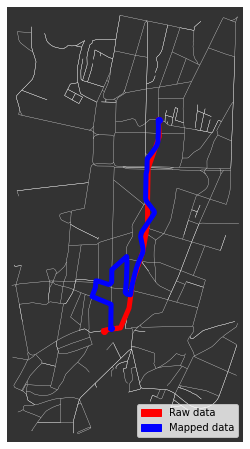

/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:326: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:422: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  points_within_geometry = points_within_geometry.append(precise_matches)
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append met

raw start
-8.61763503732 , 41.1461326732
raw end
-8.60925783906 , 41.1669309359
mapped start
-8.61763503732 , 41.1461326732
mapped end
-8.60925783906 , 41.1669309359


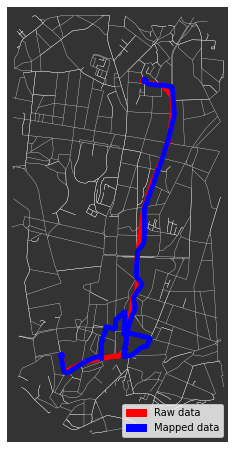

/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:326: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:422: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  points_within_geometry = points_within_geometry.append(precise_matches)
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append met

raw start
-8.64955758449 , 41.1542184253
raw end
-8.61085260054 , 41.1458850735
mapped start
-8.64955758449 , 41.1542184253
mapped end
-8.61085260054 , 41.1458850735


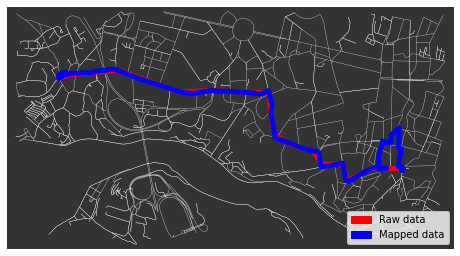

/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:326: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:422: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  points_within_geometry = points_within_geometry.append(precise_matches)
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append met

raw start
-8.61447467614 , 41.1631217415
raw end
-8.62755735653 , 41.1524123108
mapped start
-8.61447467614 , 41.1631217415
mapped end
-8.62755735653 , 41.1524123108


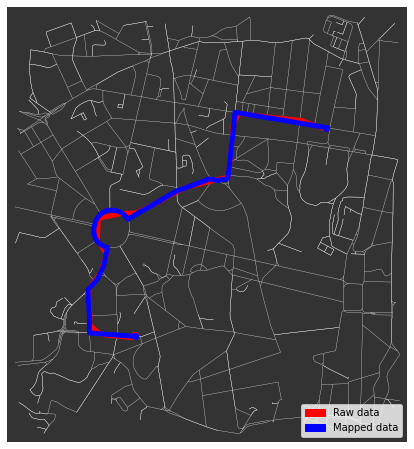

/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:326: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:422: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  points_within_geometry = points_within_geometry.append(precise_matches)
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append met

raw start
-8.6274173 , 41.1713652
raw end
-8.60139854377 , 41.183298521
mapped start
-8.6274173 , 41.1713652
mapped end
-8.60139854377 , 41.183298521


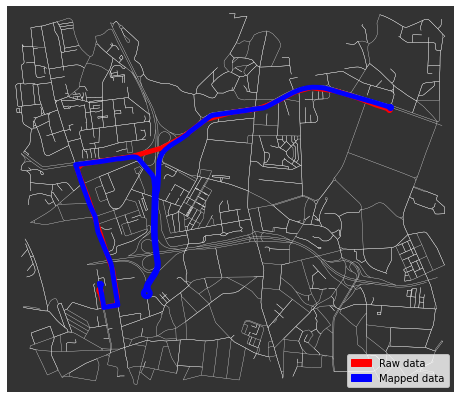

/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:326: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:422: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  points_within_geometry = points_within_geometry.append(precise_matches)
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append met

raw start
-8.63985919436 , 41.1597515041
raw end
-8.66574668502 , 41.1706803667
mapped start
-8.63985919436 , 41.1597515041
mapped end
-8.66574668502 , 41.1706803667


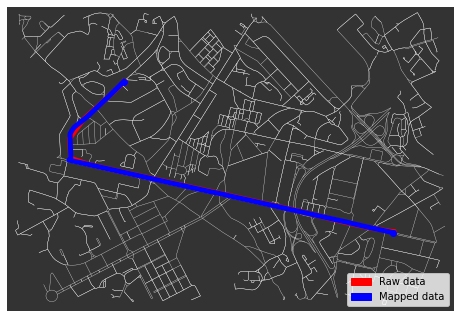

/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:326: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:422: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  points_within_geometry = points_within_geometry.append(precise_matches)
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append met

raw start
-8.66957616604 , 41.1694805718
raw end
-8.5860966 , 41.1488279
mapped start
-8.66957616604 , 41.1694805718
mapped end
-8.5860966 , 41.1488279


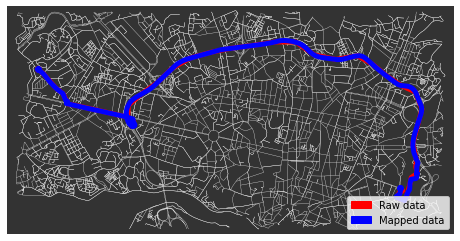

/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:326: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:422: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  points_within_geometry = points_within_geometry.append(precise_matches)
/Users/ming/opt/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:431: FutureWarning: The frame.append met

raw start
-8.60650635245 , 41.1445581213
raw end
-8.61779080334 , 41.1471932514
mapped start
-8.60650635245 , 41.1445581213
mapped end
-8.61779080334 , 41.1471932514


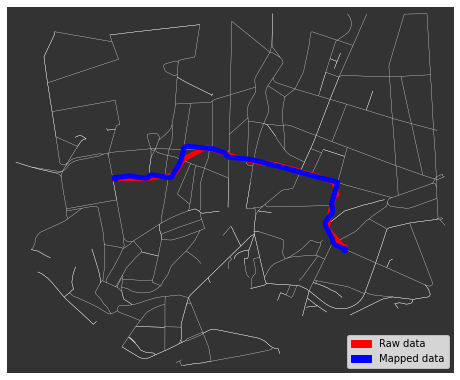

In [41]:
for i, fmm in enumerate(fmm_output.iloc[0:13]['fmm-mapped WSG84 points sequence']):
    if type(fmm) != float:
        # raw
        raw_coords = np.array(ast.literal_eval(fmm_output.iloc[0:13]['raw_gps_trajectories'][i]))
        raw_list_of_x = raw_coords[:, 0]
        raw_list_of_y = raw_coords[:, 1]

        # FMM-ed
        coords = np.array(ast.literal_eval(fmm))
        list_of_x = coords[:, 0]
        list_of_y = coords[:, 1]
        min_x = min(list_of_x - 0.005)
        max_x = max(list_of_x + 0.005)
        min_y = min(list_of_y - 0.005)
        max_y = max(list_of_y + 0.005)
        boundary = [min_x, max_x, min_y, max_y]
        boundary_polygon = Polygon([(min_x,min_y),(max_x,min_y),(max_x,max_y),(min_x,max_y)])
        G = ox.graph_from_polygon(boundary_polygon, network_type='drive')
        fig, ax = ox.plot_graph(
            G,
            show=False,
            close=False,
            bgcolor="#333333",
            edge_color="w",
            edge_linewidth=0.3,
            node_size=0,
        )

        plt.plot(raw_list_of_x,raw_list_of_y,c="r", linewidth=5)
        plt.plot(raw_list_of_x[0],raw_list_of_y[0],c="r", marker ="o")
        plt.plot(raw_list_of_x[-1],raw_list_of_y[-1],c="r", marker ="o")

        print('raw start')
        print(list_of_x[0] , ',' , list_of_y[0])
        print('raw end')
        print(list_of_x[-1] , ',' , list_of_y[-1])

        plt.plot(list_of_x,list_of_y,c="b", linewidth=5)
        plt.plot(list_of_x[0],list_of_y[0],c="b", marker ="o")
        plt.plot(list_of_x[len(list_of_x)-1],list_of_y[len(list_of_y)-1],c="b", marker ="o")

        print('mapped start')
        print(list_of_x[0] , ',' , list_of_y[0])
        print('mapped end')
        print(list_of_x[-1] , ',' , list_of_y[-1])

        import matplotlib.patches as mpatches
        red_patch = mpatches.Patch(color='red', label='Raw data')
        blue_patch = mpatches.Patch(color='blue', label='Mapped data')
        #ax.legend(handles=[red_patch])
        plt.legend(handles=[red_patch, blue_patch], loc ="lower right")
        #plt.annotate('Start', (list_of_x[0]+0.0005,list_of_y[0]+0.0005), c='r')
        #plt.annotate('End', (list_of_x[len(list_of_x)-1]+0.0005,list_of_y[len(list_of_y)-1]+0.0005), c='r')
        plt.show()


In [21]:
fmm_output.iloc[0:10]['match_success']

3       True
10      True
661    False
662    False
663    False
40      True
51      True
56      True
65      True
664    False
Name: match_success, dtype: bool